In [131]:
import numpy as np
import matplotlib.pyplot as plt

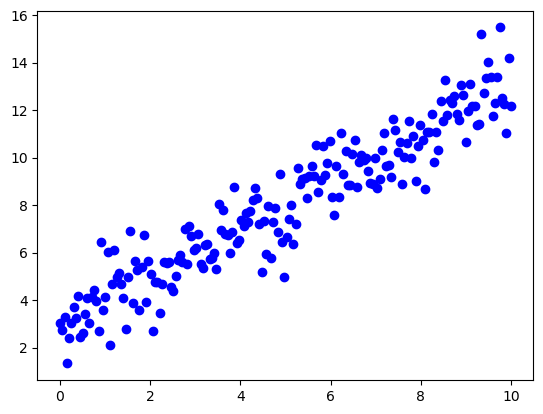

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# y = 1*x + 3
# y = a*x + b
# 0 < x < 10

#Al cambiar los valores cambia la inclinación
a = 1
b = 3

lx = np.linspace(0, 10, 200)
ly = a*lx + b

ruido = np.random.randn(200)
ly = ly + ruido

plt.scatter(lx, ly, color="b")

In [133]:
#Cogemos dos valores al azar

a = 10
b = 9

In [134]:

def predice(x):
  y_hat = a*x + b
  return y_hat

# se pasan las x y las y reales y devulve el array de errores de cada x
def error(x, y):
  y_hat = predice(x)
  err = y_hat - y
  return err

# se le pasan las x y las y reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
  err = error(x, y)
  c = err**2
  c = c.mean()
  c = c/2
  return c

#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x, y):
  err = error(x,y)
  d = err*x
  d = d.mean()
  return d

def deriva_coste_repecto_a_aprox(x, y):
  # ES IGUAL A DERIVA_COSTE_RESPECTO_A
  global a
  inc = 0.001
  c1 = coste(x, y)
  a = a + inc
  c2 = coste(x, y)
  a = a - inc
  d = (c2-c1)/inc
  return d

#1/n ∑(yi_hat -yi)=err
def deriva_coste_respecto_b(x, y):
  d = error(x,y)
  d = d.mean()
  return d

def deriva_coste_repecto_b_aprox(x, y):
  global b
  inc = 0.001
  c1 = coste(x, y)
  b = b + inc
  c2 = coste(x, y)
  b = b - inc
  d = (c2-c1)/inc
  return d

# r2 o coeficiente de detrminacion
def calc_accuracy(x, y):
  err = error(x,y)
  numerador = (err ** 2).sum()
  denominador = ((y - y.mean()) ** 2).sum()
  return 1 - numerador/denominador


pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [2.63273063 4.39306718 6.64638577]
estimados por el modelo  [14.02512563 34.12562814 59.25125628]
error  [11.392395   29.73256096 52.60487051]
coste  630.1807076905114


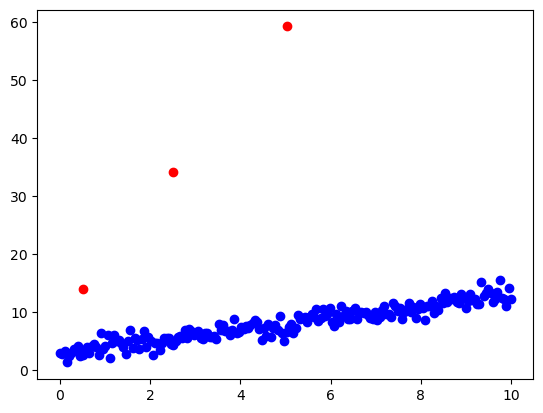

In [135]:
plt.scatter(lx, ly, color="b")

#Se coge tres valores de forma al azar en este caso 10,50,100 para comprobar el margen de error que tiene el modelo
#pru_x dará el margen de error
#pru_y dará el margen de error en el eje Y
#Entonces la idea es que converjan todas juntas
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])
print(pru_x)
print(pru_y)

#Aquí con dos posiciones el ejemplo X=5 y Y=5 nos dice el error que ha respecto a la recta
y_hat = predice(pru_x)

plt.scatter(pru_x,y_hat,color="r")
le = error(pru_x,pru_y)

#Este es el rango de error que tiene los puntos en respecto al resto 
print(le)

#El costo de los márgenes de error
c = (coste(pru_x,pru_y))
c

Metrica de error : Si lo que queremos es predecir un número real lo más habitual es que sea el error métrico cuadrado (MSE) donde tendremos dos casos,

Cuando intentamos predecir un número

Cuando intentamos predecir una clase como en una foto

**C = 1/2 (y^ - y)^2**

Y^ = Error

(y^ - y) pueden ser varios por lo que suele hacerse la media

Derivada del coste calculado respecto a Y = **C = (y^ - y)**

y = ax + b

sabemos la derivada del coste respecto a Y

**y sabemos la derivada de dy/da = x**

Utilizamos la regla de la cadena

**dc/da = dc/dy * dy/da**

dc/da = (y^ - y) * x

dc/db = dc/dy * dy/b


**RESUMEN SI PUEDE VARIAR DOS VALORES**

Descenso de gradiente = derivada_coste_respecto_a * derivada_coste_respecto_b * ...

Descenso de gradiente = (y^ - y) * x * 1



In [136]:
# Learning rate 
pru_x = lx
pru_y = ly
lr = 0.01
a = 10
b = 9

In [149]:
# Vamos mirar los errores en esa posición con 3 puntos
# EL MEJOR ENTRENAMIENTO DE ESTOS 3 FITS

import random


def fit(x_train, y_train, batch_size=None, lr = 0.01,
              epochs=100, x_test = None, y_test = None):
  global a, b
  la = []
  lb = []
  lloss = []
  lloss_test = []
  if batch_size is None: batch_size = len(x_train)
  nbatchs = len(x_train)//batch_size

  for _ in range(epochs):
    # barajar
    laux = [i for i in range(len(x_train))]
    random.shuffle(laux)
    x_new = np.array([x_train[i] for i in laux])
    y_new = np.array([y_train[i] for i in laux])
    x_train = x_new
    y_train = y_new

    for lote in range(nbatchs):
      sl1 = lote*batch_size
      sl2 = sl1 + batch_size
      x_t = x_train[sl1:sl2]
      y_t = y_train[sl1:sl2]
      da = deriva_coste_respecto_a(x_t, y_t)
      db = deriva_coste_respecto_b(x_t, y_t)
      a = a - lr*da
      b = b - lr*db
      loss = coste(x_t, y_t)
      loss_test = 0
      if x_test is not None: loss_test = coste(x_test, y_test)
      la.append(a); lb.append(b); lloss.append(loss); lloss_test.append(loss_test)
      #print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, lloss_test, la, lb

# Si volvemos al gráfico vemos que se va acercando al valor seleccionado    
# Vemos que la perdida va disminuyendo el coste en este caso Perdida donde B y A se van acercando a su valor

a: 0.8170210829102746  b: 4.2760684287765285 loss: 0.6881213009338879 r2 = 0.8281130021692275


(0.0, 10.0)

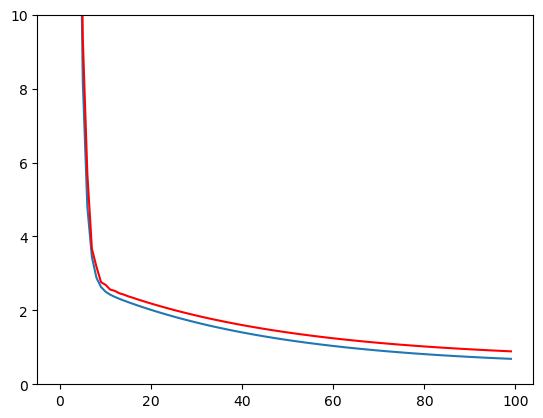

In [192]:
# CON ESTO OBTENDRIAMOS LOS VALORES DE PERDIDA Y ASÍ VEMOS CON CUANTAS VUELTAS MEJORA
# Learning Rate es muy crítico, si tienes un valor muy alto puede petar

a = 10
b = 9


# PERMITE BARAJAS PARA DIVIDIR ENTRE TEST Y ENTRENAMIENTO
lg = int(0.8 * len(lx))

laux = [i for i in range(len(lx))]
random.shuffle(laux)
x_n = np.array([lx[i] for i in laux])
y_n = np.array([ly[i] for i in laux])

lx_train = x_n[:lg]
ly_train = y_n[:lg]
lx_test = x_n[lg:]
ly_test = y_n[lg:]

#lx_train = lx[:lg]
#ly_train = ly[:lg]
#lx_test = lx[lg:]
#ly_test = ly[lg:]


lloss, lloss_test, la, lb = fit(lx_train, ly_train, lr=0.05, epochs=100,
                                batch_size=None, x_test = lx_test, y_test = ly_test)
print(f"a: {la[-1]}  b: {lb[-1]} loss: {lloss[-1]} r2 = {calc_accuracy(lx_test, ly_test)}")

plt.plot(range(len(lloss)), lloss)
plt.plot(range(len(lloss_test)), lloss_test, color="r")
plt.ylim(0,10)

1.0087988267450032 2.964992766788096 [ 0 10] [ 2.96499277 13.05298103]


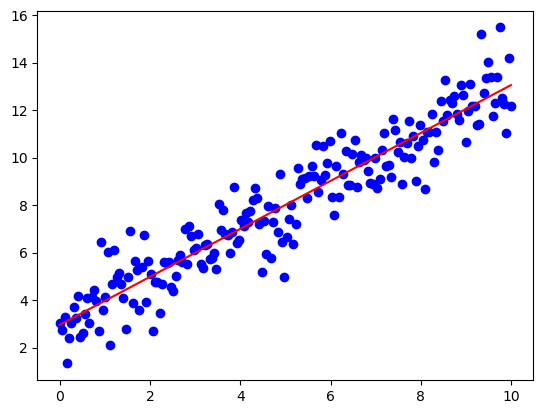

In [141]:
plt.scatter(lx, ly, color="b")
xpru = np.array([0, 10])
ypru = predice(xpru)
print(a, b, xpru, ypru)
plt.plot(xpru, ypru, color="r")

In [142]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')


def drawframe(n):
    global line
    if(n < len(la)):
      a1 = la[n]
      b1 = lb[n]
      x1 = [0, 10]
      y1 = [b1, 10*a1 + b1]
      line.set_data(x1, y1)
    #ax.set_title(f'epoch = {n/len(x):4d}'.format(n))
    return (line,)  #OJO!!! hay que retornar una tupla!!!!

global line
def dibuja_evolucion():
  global line
  fig = plt.figure()
  ax = plt.axes()
  line,  = ax.plot([0, 10], [b, 10*a + b], color="y")
  ax.scatter(lx, ly)
  # blit=True re-draws only the parts that have changed.
  anim = animation.FuncAnimation(fig, drawframe, frames=int((len(la)-1)/3), interval=5, blit=False, repeat=False)
  return anim



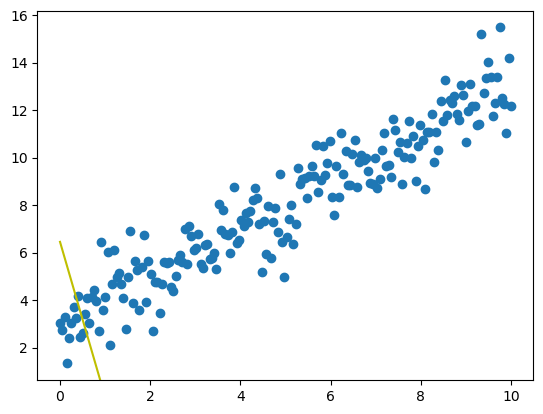

In [143]:
anim = dibuja_evolucion()
anim

In [144]:
import random


def fit3(x_train, y_train, batch_size=None, lr = 0.01,
              epochs=100, x_test = None, y_test = None):
  global a, b
  la = []
  lb = []
  lloss = []
  lloss_test = []
  if batch_size is None: batch_size = len(x_train)
  nbatchs = len(x_train)//batch_size

  for _ in range(epochs):
    # barajar
    laux = [i for i in range(len(x_train))]
    random.shuffle(laux)
    x_new = np.array([x_train[i] for i in laux])
    y_new = np.array([y_train[i] for i in laux])
    x_train = x_new
    y_train = y_new

    for lote in range(nbatchs):
      sl1 = lote*batch_size
      sl2 = sl1 + batch_size
      x_t = x_train[sl1:sl2]
      y_t = y_train[sl1:sl2]
      da = deriva_coste_respecto_a(x_t, y_t)
      db = deriva_coste_respecto_b(x_t, y_t)
      a = a - lr*da
      b = b - lr*db
      loss = coste(x_t, y_t)
      loss_test = coste(x_test, y_test)
      la.append(a); lb.append(b); lloss.append(loss); lloss_test.append(loss_test)
      #print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, lloss_test, la, lb

In [145]:
a = 10
b = 9

# 80 % Para entrenar el modelo y 20 % para test
lg = int(0.8 * len(lx))

lx_train = lx[:lg]
ly_train = ly[:lg]
lx_test = lx[lg:]
ly_test = ly[lg:]

a: 0.5601906119470503  b: 5.270798235010944 loss: 1.1065254731007386 r2 = 0.7161761739426479


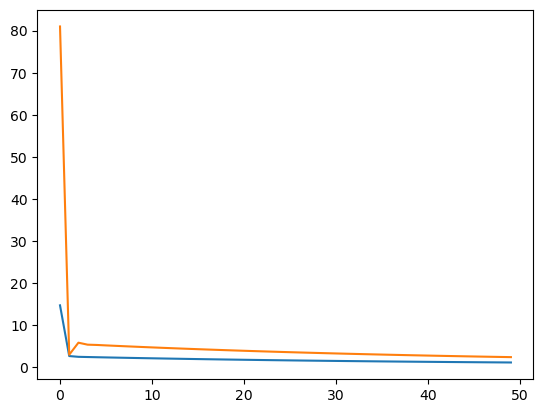

In [146]:

lloss, lloss_test, la, lb = fit3(lx_train, ly_train, lr=0.05, epochs=50,
                                batch_size=None, x_test = lx_test, y_test = ly_test)
print(f"a: {la[-1]}  b: {lb[-1]} loss: {lloss[-1]} r2 = {calc_accuracy(lx, ly)}")

plt.plot(range(len(lloss)), lloss)
plt.plot(range(len(lloss_test)), lloss_test)

In [147]:
c_train = coste(lx_train, ly_train)
c_test = coste(lx_test, ly_test)
r2_train = calc_accuracy(lx_train, ly_train)
r2_test = calc_accuracy(lx_test, ly_test)
print(f"c_train: {c_train} c_test: {c_test} r2_train: {r2_train} r2_test: {r2_test}")

c_train: 1.1065254731007386 c_test: 2.378458161143444 r2_train: 0.6397968550748303 r2_test: -1.7553335727546089
